In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Check that TF 2.3.0 is in use
print(tf.__version__)

2.3.0


In [ ]:
#Import dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']             

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

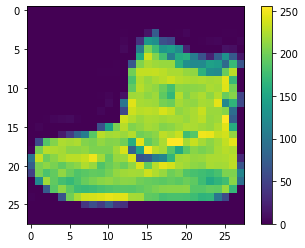

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalize 
train_images = train_images/255.0
test_images = test_images/255.0
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
print('Reshaped Training Features:', train_images.shape)
print('Reshaped Testing Features:', test_images.shape)
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    data_train = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    data_test = test_images_test.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)#print('Reshaped Training Features:', train_images.shape)
print('Reshaped Testing Features:', test_images.shape)
#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(train_labels, num_classes=10)
labels_test = tf.keras.utils.to_categorical(test_labels, num_classes=10)

Reshaped Training Features: (60000, 28, 28)
Reshaped Testing Features: (10000, 28, 28)
Reshaped Testing Features: (10000, 28, 28, 1)


In [ ]:
def CNN_overfit():  
    model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000, activation='relu',use_bias=True),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(1000, activation='relu',use_bias=True),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(500, activation='relu',use_bias=True),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(128, activation='relu',use_bias=True),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation='softmax')
            ])
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='Adam', metrics=['accuracy'])
history_overfit1 = CNN_overfit.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(test_images, test_labels)  

Epoch 1/5
60/60 [==============================] - 16s 266ms/step - loss: 0.7215 - accuracy: 0.7377 - val_loss: 0.4496 - val_accuracy: 0.8385
Epoch 2/5
60/60 [==============================] - 16s 269ms/step - loss: 0.4245 - accuracy: 0.8475 - val_loss: 0.3809 - val_accuracy: 0.8608
Epoch 3/5
60/60 [==============================] - 16s 272ms/step - loss: 0.3726 - accuracy: 0.8656 - val_loss: 0.3847 - val_accuracy: 0.8590
Epoch 4/5
60/60 [==============================] - 16s 271ms/step - loss: 0.3483 - accuracy: 0.8733 - val_loss: 0.3531 - val_accuracy: 0.8710
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3600 - accuracy: 0.8723


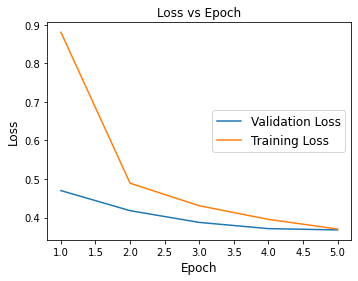

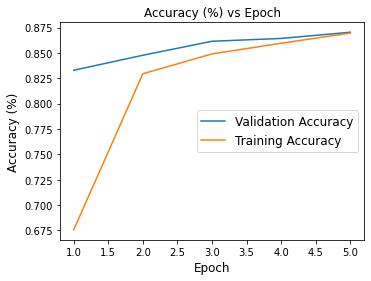

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(np.linspace(1, 5, num=5, endpoint=True), history_overfit.history['val_loss']) 
plt.plot(np.linspace(1, 5, num=5, endpoint=True),history_overfit.history['loss'])
plt.title('Loss vs Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(('Validation Loss','Training Loss'), fontsize=12, loc=5)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(np.linspace(1, 5, num=5, endpoint=True), history_overfit.history['val_accuracy']) 
plt.plot(np.linspace(1, 5, num=5, endpoint=True),history_overfit.history['accuracy'])
plt.title('Accuracy (%) vs Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(('Validation Accuracy','Training Accuracy'), fontsize=12, loc=5)